In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos

# Questão 1

In [2]:
artificial_dataset = np.loadtxt('artificial1d.csv', delimiter=',', skiprows=1)
artificial_dataset

array([[-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,  1.42295695],
       [ 1.        ,

## Questão 1 a)

OLS com o dataset artificial1d

Parâmetros do modelo: [[0.08956111]
 [1.51328267]]
RMSE: 0.4557547135753802
MSE: 0.20771235894617687


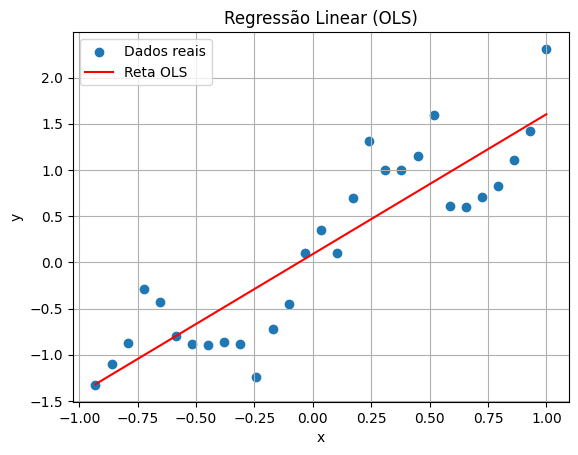

In [8]:

dataset = artificial_dataset.copy()

X = np.c_[np.ones(dataset.shape[0]),dataset[:,[0]]]
y = dataset[:,[1]]

w = np.linalg.inv(X.T @ X )@ X.T @ y

ypred = X @ w

rmse = np.sqrt(np.mean((y-ypred)**2))
mse = np.mean((y-ypred)**2)

print("Parâmetros do modelo:", w)
print("RMSE:",rmse)
print("MSE:",mse)

plt.scatter(dataset[:, 0], dataset[:, 1], label='Dados reais')
plt.plot(dataset[:, 0], ypred, color='red', label='Reta OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear (OLS)')
plt.legend()
plt.grid(True)
plt.show()

## Questão 1 b)

Normalizando o dataset

In [4]:

u = dataset.sum(axis = 0) / dataset.shape[0]
o = np.sqrt(((dataset-u)**2).sum(axis=0)/(dataset.shape[0]-1))

normalizado = (dataset[:,:3] -u )/o

print(normalizado)

[[-1.64421661e+00 -1.46521540e+00]
 [-1.52677257e+00 -1.24436167e+00]
 [-1.40932853e+00 -1.01326302e+00]
 [-1.29188448e+00 -4.25750867e-01]
 [-1.17444044e+00 -5.71527414e-01]
 [-1.05699640e+00 -9.34260433e-01]
 [-9.39552351e-01 -1.02535636e+00]
 [-8.22108307e-01 -1.03915504e+00]
 [-7.04664263e-01 -1.00118982e+00]
 [-5.87220220e-01 -1.02733540e+00]
 [-4.69776176e-01 -1.37440389e+00]
 [-3.52332132e-01 -8.59254265e-01]
 [-2.34888088e-01 -5.92347900e-01]
 [-1.17444044e-01 -4.27414324e-02]
 [ 2.12697189e-16  2.06731481e-01]
 [ 1.17444044e-01 -4.41595724e-02]
 [ 2.34888088e-01  5.57120919e-01]
 [ 3.52332132e-01  1.16597720e+00]
 [ 4.69776176e-01  8.57978258e-01]
 [ 5.87220220e-01  8.59381452e-01]
 [ 7.04664263e-01  1.00495190e+00]
 [ 8.22108307e-01  1.44699830e+00]
 [ 9.39552351e-01  4.66230538e-01]
 [ 1.05699640e+00  4.51591726e-01]
 [ 1.17444044e+00  5.59923441e-01]
 [ 1.29188448e+00  6.79951154e-01]
 [ 1.40932853e+00  9.62416842e-01]
 [ 1.52677257e+00  1.27815345e+00]
 [ 1.64421661e+00  2

GD com o dataset artificial1d

Parâmetros do modelo: [[0.08966088]
 [1.51135109]]
RMSE: 0.6750970942583882
MSE: 0.455756086676119


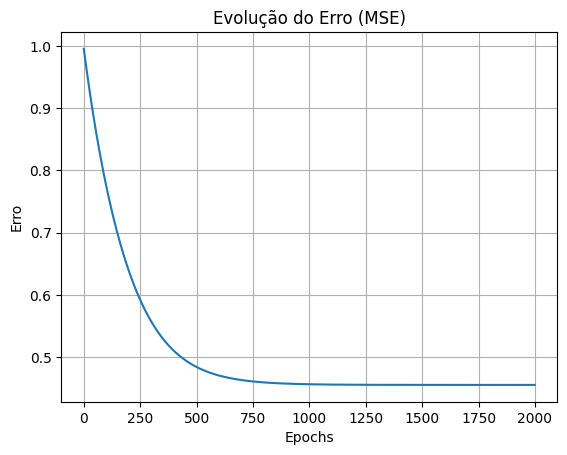

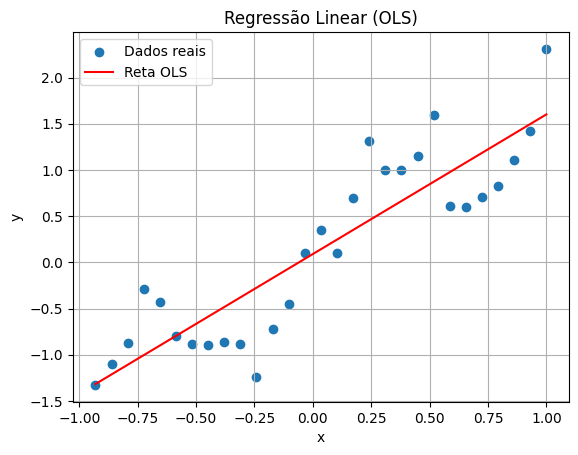

In [9]:
N = artificial_dataset.shape[0]

X = np.c_[np.ones(artificial_dataset.shape[0]),artificial_dataset[:,[0]]]
y = artificial_dataset[:,[1]]
ye = artificial_dataset[:,[1]]

w = np.zeros((X.shape[1],1))

historic_w = []
alpha = 0.01
epochs = 2000

losses = []

for i in range(epochs):
    ypred = X @ w
    grad = (1/N) * (X.T @ (y - X @ w))
    w = w + alpha * grad
    historic_w.append(w.flatten().copy())
    # print("Epoch", i, "w:", w)

    # ypred_real = (ypred * o) + u
    losses.append(np.sqrt(np.mean((ye-ypred)**2)))

print("Parâmetros do modelo:", w)
print("RMSE:", np.sqrt(losses[-1]))
print("MSE:", losses[-1])

plt.plot(losses)
plt.title('Evolução do Erro (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

plt.scatter(artificial_dataset[:, 0], artificial_dataset[:, 1], label='Dados reais')
plt.plot(artificial_dataset[:, 0], ypred, color='red', label='Reta OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear (OLS)')
plt.legend()
plt.grid(True)
plt.show()

## Questão 1 c)

SGD com o dataset artificial1d

Parâmetros do modelo: [[0.08412629]
 [1.5111675 ]]
RMSE: 0.4557896268581439
MSE: 0.20774418395148606


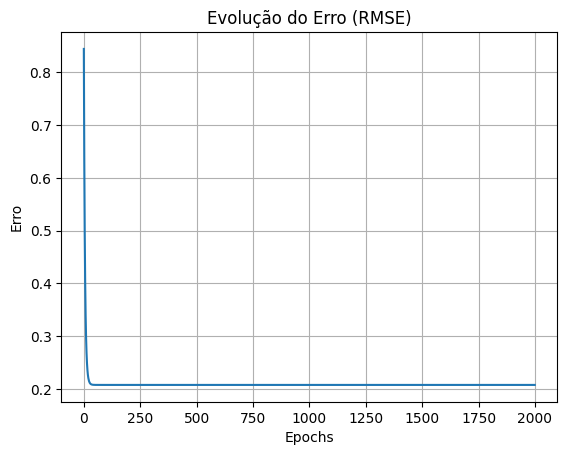

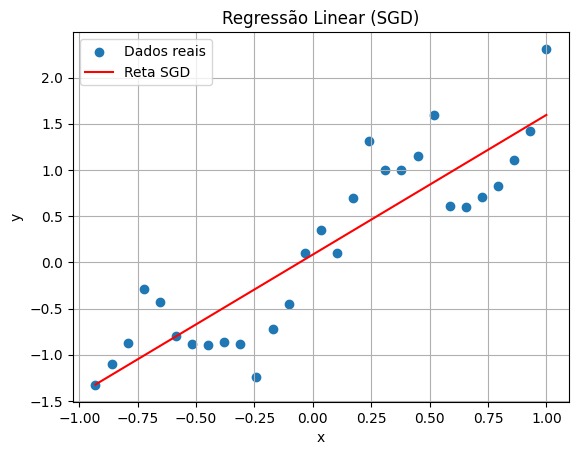

In [20]:
N = artificial_dataset.shape[0]

X = np.c_[np.ones(artificial_dataset.shape[0]),artificial_dataset[:,[0]]]
y = artificial_dataset[:,[1]]
ye = dataset[:,[1]]

w = np.zeros((X.shape[1],1))

historic_w = []
alpha = 0.01
epochs = 2000

losses = []

N = np.random.permutation(N)

for epochs in range(epochs):
    for i in N:
        xi = X[i,:].reshape((1,-1))
        yi = y[i]
        ypredi = xi @ w
        grad = xi.T @ (yi - ypredi)
        w = w + alpha * grad
    ypred = X @ w

    historic_w.append(w.flatten().copy())
    # print("Epoch", i, "w:", w)
    losses.append(np.mean((ye-ypred)**2))

print("Parâmetros do modelo:", w)
print("RMSE:", np.sqrt(losses[-1]))
print("MSE:", losses[-1])

plt.plot(losses)
plt.title('Evolução do Erro (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

plt.scatter(artificial_dataset[:, 0], artificial_dataset[:, 1], label='Dados reais')
plt.plot(artificial_dataset[:, 0], ypred, color='red', label='Reta SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear (SGD)')
plt.legend()
plt.grid(True)
plt.show()

# Questão 2

In [21]:
california_dataset = np.loadtxt('california.csv', delimiter=',', skiprows=1)
california_dataset

array([[   2.8194    ,   24.        ,    4.7625    , ...,   36.75      ,
        -119.85      ,    0.811     ],
       [   2.425     ,   46.        ,    4.92771084, ...,   36.33      ,
        -119.31      ,    0.849     ],
       [   3.1205    ,   16.        ,    3.72847682, ...,   33.87      ,
        -117.99      ,    1.74      ],
       ...,
       [   4.7308    ,   35.        ,    5.66666667, ...,   33.83      ,
        -118.37      ,    3.534     ],
       [   4.2788    ,   10.        ,    5.375     , ...,   33.68      ,
        -117.35      ,    1.25      ],
       [   2.8036    ,   18.        ,    3.27400881, ...,   34.1       ,
        -118.35      ,    2.25      ]], shape=(999, 9))

In [33]:
dataset = california_dataset.copy()

N = dataset.shape[0]

indices = np.random.permutation(N)

tam_treino = int(0.8 * N)
indices_treino = indices[:tam_treino]
indices_teste = indices[tam_treino:]
dataset_treino = dataset[indices_treino]
dataset_teste = dataset[indices_teste]

X_train = dataset_treino[:,:-1]
y_train = dataset_treino[:,-1:]
X_test = dataset_teste[:,:-1]
y_test = dataset_teste[:,-1:]

X_train


array([[   3.6435    ,   18.        ,    3.25806452, ...,    1.74596774,
          33.89      , -117.88      ],
       [   3.0147    ,   15.        ,   15.5112782 , ...,    2.71804511,
          39.27      , -120.58      ],
       [   1.1479    ,   29.        ,    4.02352941, ...,    2.32941176,
          40.87      , -124.08      ],
       ...,
       [   3.2569    ,   15.        ,    5.44444444, ...,    2.35714286,
          36.84      , -119.77      ],
       [   3.6694    ,   52.        ,    5.05839416, ...,    2.66058394,
          37.73      , -122.43      ],
       [   3.5522    ,   11.        ,    6.0494045 , ...,    2.87207764,
          40.55      , -122.31      ]], shape=(799, 8))

In [34]:
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)

X_train_norm = (X_train - X_min) / (X_max - X_min)
X_test_norm = (X_test - X_min) / (X_max - X_min)

u_train = y_train.sum(axis = 0) / y_train.shape[0]
o_train = np.sqrt(((y_train-u)**2).sum(axis=0)/(y_train.shape[0]-1))

u_test = y_test.sum(axis = 0) / y_test.shape[0]
o_test = np.sqrt(((y_test-u)**2).sum(axis=0)/(y_test.shape[0]-1))

y_train_norm = (y_train - u_train) / o_train
y_test_norm = (y_test - u_test) / o_test



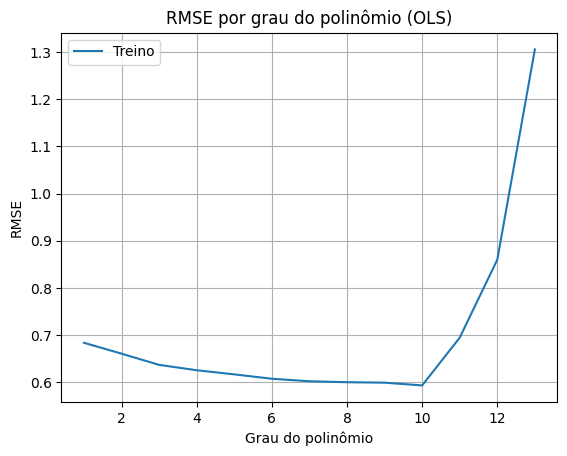

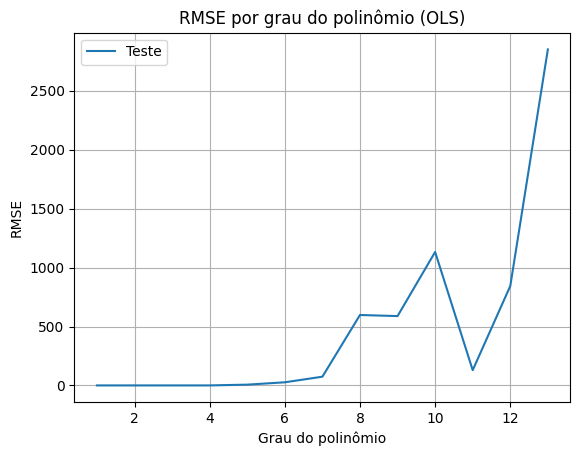

In [ ]:
import matplotlib.pyplot as plt

rmse_train = []
rmse_test = []

for grau in range(1, 14):
    Xp_train = construir_X_polynomial(X_train_norm, grau)
    Xp_test = construir_X_polynomial(X_test_norm, grau)

    w = treinar_ols(Xp_train, y_train_norm)  

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # RMSE
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS)')
plt.legend()
plt.grid(True)
plt.show()

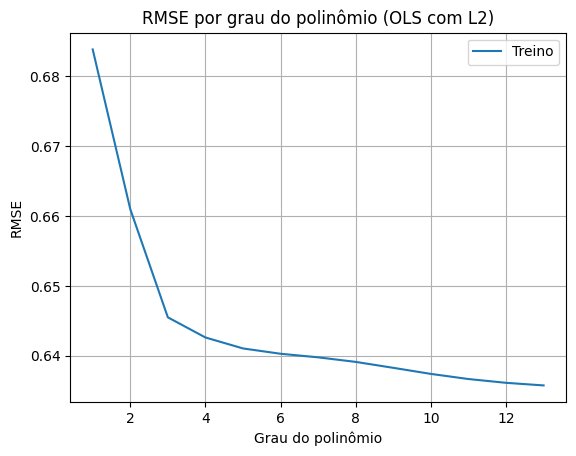

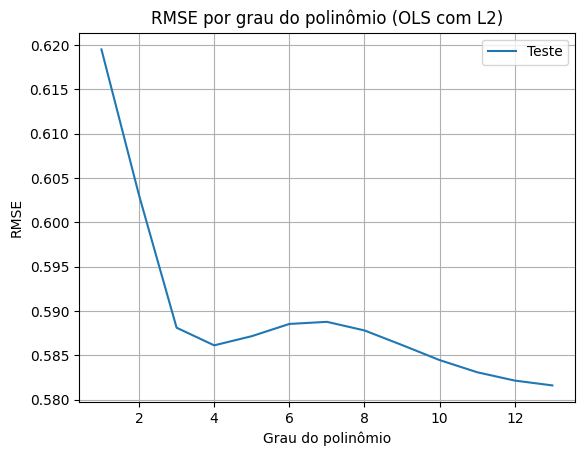

In [68]:
import matplotlib.pyplot as plt

rmse_train = []
rmse_test = []

for grau in range(1, 14):
    Xp_train = construir_X_polynomial(X_train_norm, grau)
    Xp_test = construir_X_polynomial(X_test_norm, grau)

    w = treinar_ridge(Xp_train, y_train_norm,0.01)  

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # RMSE
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS com L2)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (OLS com L2)')
plt.legend()
plt.grid(True)
plt.show()

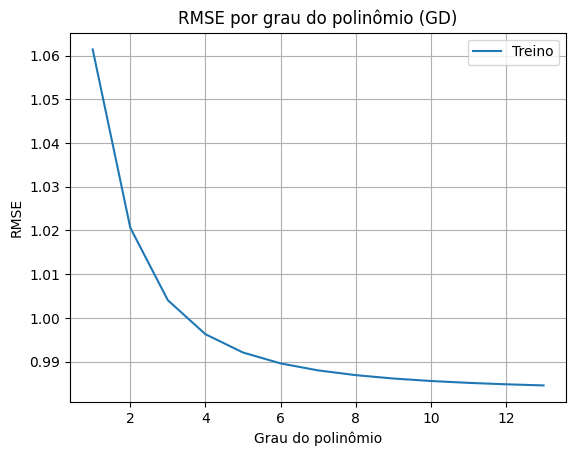

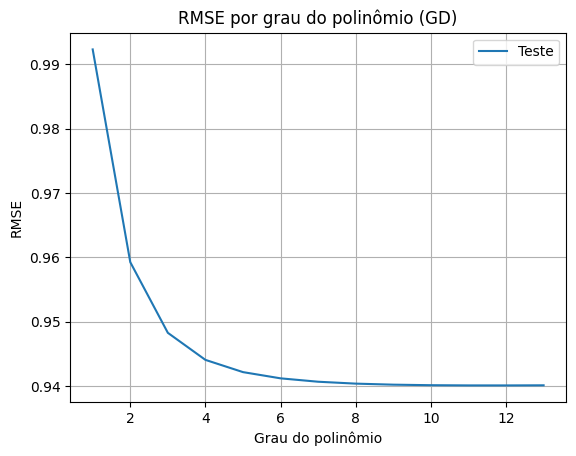

In [69]:
import matplotlib.pyplot as plt

rmse_train = []
rmse_test = []

losses = []

alpha = 0.01
epochs = 1000

for grau in range(1, 14):
    Xp_train = construir_X_polynomial(X_train_norm, grau)
    Xp_test = construir_X_polynomial(X_test_norm, grau)

    w = np.zeros((Xp_train.shape[1],1))

    for i in range(epochs):
        grad = (1/N) * (Xp_train.T @ (y_train_norm - Xp_train @ w)) 
        w = w + alpha * grad

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # RMSE
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD)')
plt.legend()
plt.grid(True)
plt.show()

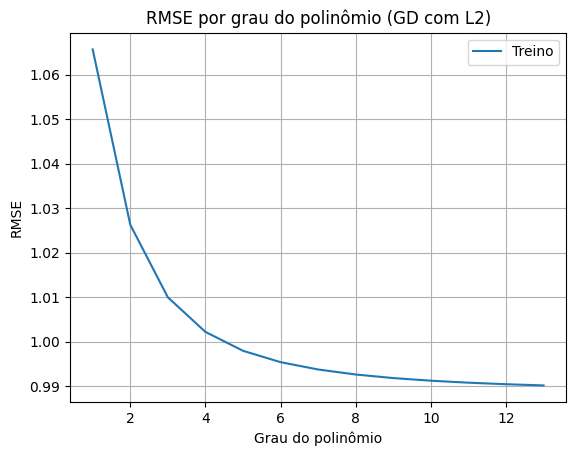

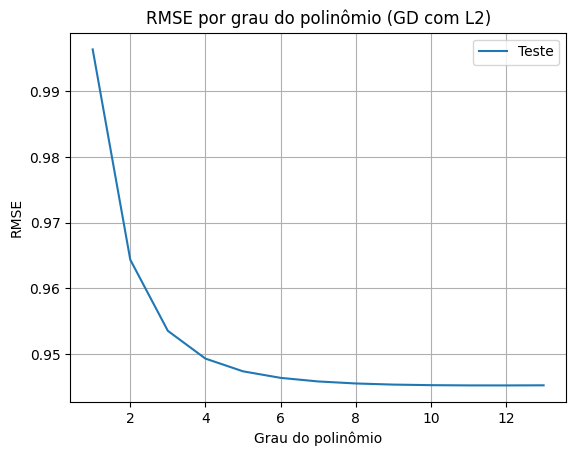

In [70]:
import matplotlib.pyplot as plt

rmse_train = []
rmse_test = []

losses = []

alpha = 0.01
epochs = 1000
lambd = 0.01

for grau in range(1, 14):
    Xp_train = construir_X_polynomial(X_train_norm, grau)
    Xp_test = construir_X_polynomial(X_test_norm, grau)

    w = np.zeros((Xp_train.shape[1],1))

    for i in range(epochs):
        grad = (1/N) * (Xp_train.T @ (y_train_norm - Xp_train @ w)) - lambd *w
        w = w + alpha * grad

    # Predição e desnormalização
    y_pred_train = Xp_train @ w * o_train + u_train
    y_pred_test = Xp_test @ w * o_test + u_test

    # RMSE
    rmse_train.append(np.sqrt(np.mean((y_train - y_pred_train) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test - y_pred_test) ** 2)))

plt.plot(range(1, 14), rmse_train, label='Treino')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD com L2)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, 14), rmse_test, label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinômio (GD com L2)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
def construir_X_polynomial(X, grau):
    n, d = X.shape
    X_poly = np.ones((n, 1))  # termo bias (x^0)

    for g in range(1, grau + 1):
        X_poly = np.hstack((X_poly, X ** g))  # cada atributo elevado a g

    return X_poly

In [23]:
def treinar_ols(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y


In [36]:
def treinar_ridge(X, y, lambd):
    n = X.shape[1]
    I = np.eye(n)
    return np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y
